In [171]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [172]:
customer=pd.read_csv('/content/customer_data_5pNwh8HRSV.csv')


In [173]:
customer

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [174]:
customer=customer.drop(['ID','Var_1'],axis=1)

In [175]:
customer

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,A
...,...,...,...,...,...,...,...,...,...
8063,Male,No,22,No,NaN,0.0,Low,7.0,D
8064,Male,No,35,No,Executive,3.0,Low,4.0,D
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0,D
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,B


In [176]:
customer.isnull().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Segmentation         0
dtype: int64

In [177]:
customer.dropna(subset=["Ever_Married"], inplace=True)

In [178]:
customer.dropna(subset=["Graduated"], inplace=True)

In [179]:
customer.dropna(subset=["Profession"], inplace=True)

In [180]:
customer.dropna(subset=["Work_Experience"], inplace=True)

In [181]:
customer.dropna(subset=["Family_Size"], inplace=True)

In [182]:
customer

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,D
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B
5,Male,Yes,56,No,Artist,0.0,Average,2.0,C
6,Male,No,32,Yes,Healthcare,1.0,Low,3.0,C
...,...,...,...,...,...,...,...,...,...
8062,Male,Yes,41,Yes,Artist,0.0,High,5.0,B
8064,Male,No,35,No,Executive,3.0,Low,4.0,D
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0,D
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,B


In [183]:
fam = customer[ (customer['Family_Size'] == 7) & (customer['Age'] == 8) & customer['Family_Size']==9 ].index
customer.drop(fam , inplace=True)

In [184]:
customer

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,D
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B
5,Male,Yes,56,No,Artist,0.0,Average,2.0,C
6,Male,No,32,Yes,Healthcare,1.0,Low,3.0,C
...,...,...,...,...,...,...,...,...,...
8062,Male,Yes,41,Yes,Artist,0.0,High,5.0,B
8064,Male,No,35,No,Executive,3.0,Low,4.0,D
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0,D
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,B


In [185]:
y=customer['Segmentation']

In [186]:
y

0       D
2       B
3       B
5       C
6       C
       ..
8062    B
8064    D
8065    D
8066    B
8067    B
Name: Segmentation, Length: 6718, dtype: object

In [187]:
X=customer.drop(['Segmentation'],axis=1)

In [188]:
X

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,Male,No,22,No,Healthcare,1.0,Low,4.0
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0
5,Male,Yes,56,No,Artist,0.0,Average,2.0
6,Male,No,32,Yes,Healthcare,1.0,Low,3.0
...,...,...,...,...,...,...,...,...
8062,Male,Yes,41,Yes,Artist,0.0,High,5.0
8064,Male,No,35,No,Executive,3.0,Low,4.0
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0


In [189]:
X.columns

Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size'],
      dtype='object')

In [190]:
category_cols=['Gender','Ever_Married','Graduated','Profession','Spending_Score']

In [191]:
X_1=pd.get_dummies(X,columns=category_cols)
X_1.shape

(6718, 21)

In [192]:
X_1

,Age,Work_Experience,Family_Size,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,...,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_Average,Spending_Score_High,Spending_Score_Low
0,22,1.0,4.0,0,1,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,67,1.0,1.0,1,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,67,0.0,2.0,0,1,0,1,0,1,0,...,0,0,0,0,0,1,0,0,1,0
5,56,0.0,2.0,0,1,0,1,1,0,1,...,0,0,0,0,0,0,0,1,0,0
6,32,1.0,3.0,0,1,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8062,41,0.0,5.0,0,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,1,0
8064,35,3.0,4.0,0,1,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
8065,33,1.0,1.0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
8066,27,1.0,4.0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [193]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_scaled=sc.fit_transform(X_1)
X_scaled

array([[-1.30356175, -0.4786918 ,  0.76039095, ..., -0.57677733,
        -0.42113794,  0.81695243],
       [ 1.42174774, -0.4786918 , -1.20913985, ..., -0.57677733,
        -0.42113794,  0.81695243],
       [ 1.42174774, -0.77243052, -0.55262958, ..., -0.57677733,
         2.37451888, -1.22406148],
       ...,
       [-0.63737498, -0.4786918 , -1.20913985, ..., -0.57677733,
        -0.42113794,  0.81695243],
       [-1.00074958, -0.4786918 ,  0.76039095, ..., -0.57677733,
        -0.42113794,  0.81695243],
       [-0.39512525, -0.77243052,  0.10388068, ...,  1.73377133,
        -0.42113794, -1.22406148]])

In [194]:
from sklearn.preprocessing import LabelEncoder
df2Corr = customer.copy()
df2Corr['Segmentation'] = LabelEncoder().fit_transform(df2Corr['Segmentation'])

In [195]:
y=df2Corr['Segmentation']

In [196]:
customer['Segmentation'].nunique()

4

In [197]:
y

0       3
2       1
3       1
5       2
6       2
       ..
8062    1
8064    3
8065    3
8066    1
8067    1
Name: Segmentation, Length: 6718, dtype: int64

This is a classification problem as we are segmenting the customer data based on classification

In [198]:
from sklearn.model_selection import train_test_split

X_train_1,X_test_1,y_train_1,y_test_1=train_test_split(X_scaled,y,test_size=0.2,random_state=10)
X_train_1.shape,X_test_1.shape,y_train_1.shape,y_test_1.shape

((5374, 21), (1344, 21), (5374,), (1344,))

Building the model

Epoch 1/10
135/135 [==============================] - 1s 4ms/step - loss: 1.1980 - accuracy: 0.4575 - val_loss: 1.1257 - val_accuracy: 0.4995
Epoch 2/10
135/135 [==============================] - 0s 2ms/step - loss: 1.0945 - accuracy: 0.5234 - val_loss: 1.1113 - val_accuracy: 0.5051
Epoch 3/10
135/135 [==============================] - 0s 2ms/step - loss: 1.0752 - accuracy: 0.5350 - val_loss: 1.1126 - val_accuracy: 0.4940
Epoch 4/10
135/135 [==============================] - 0s 2ms/step - loss: 1.0639 - accuracy: 0.5385 - val_loss: 1.1046 - val_accuracy: 0.5098
Epoch 5/10
135/135 [==============================] - 0s 2ms/step - loss: 1.0560 - accuracy: 0.5425 - val_loss: 1.1088 - val_accuracy: 0.4967
Epoch 6/10
135/135 [==============================] - 0s 2ms/step - loss: 1.0500 - accuracy: 0.5471 - val_loss: 1.0991 - val_accuracy: 0.5023
Epoch 7/10
135/135 [==============================] - 0s 2ms/step - loss: 1.0435 - accuracy: 0.5541 - val_loss: 1.1075 - val_accuracy: 0.5033
Epoch 

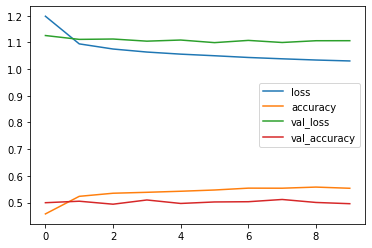

In [199]:
model_1=tf.keras.Sequential()
model_1.add(tf.keras.layers.Flatten())
model_1.add(tf.keras.layers.Dense(90, activation='relu'))
model_1.add(tf.keras.layers.Dense(4,activation='softmax'))
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])
#Training the model
tf.random.set_seed(100)
#validation split
hist_1=model_1.fit(X_train_1,y_train_1,epochs=10,validation_split=0.2)
pd.DataFrame(hist_1.history).plot();

The no of units for the hidden layer was chosen to be more than 80 and less than 100 depending on the train size and as there are 4 classes for segmentation, we have taken no of units as 4 for the output layer

In [200]:
#Evaluating
model_1.evaluate(X_test_1,y_test_1)

42/42 [==============================] - 0s 1ms/step - loss: 1.0738 - accuracy: 0.5275


[1.073756456375122, 0.527529776096344]

In [201]:
print('Test loss',1.0700082778930664)
print('Test accuracy', 0.5334821343421936)

Test loss 1.0700082778930664
Test accuracy 0.5334821343421936


In [214]:
model_1.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_28 (Flatten)        (None, 21)                0         
                                                                 
 dense_65 (Dense)            (None, 90)                1980      
                                                                 
 dense_66 (Dense)            (None, 4)                 364       
                                                                 
Total params: 2,344
Trainable params: 2,344
Non-trainable params: 0
_________________________________________________________________


The test loss(1.07) and training loss are almost equal to each other hence we can say that even though it is not a good model, owing to the accuracy, this model has a bit of overfitting.

With Dropout:

Epoch 1/10
135/135 [==============================] - 1s 3ms/step - loss: 1.2049 - accuracy: 0.4557 - val_loss: 1.1337 - val_accuracy: 0.4837
Epoch 2/10
135/135 [==============================] - 0s 2ms/step - loss: 1.1020 - accuracy: 0.5169 - val_loss: 1.1210 - val_accuracy: 0.4930
Epoch 3/10
135/135 [==============================] - 0s 2ms/step - loss: 1.0865 - accuracy: 0.5213 - val_loss: 1.1186 - val_accuracy: 0.4847
Epoch 4/10
135/135 [==============================] - 0s 2ms/step - loss: 1.0735 - accuracy: 0.5329 - val_loss: 1.1096 - val_accuracy: 0.5014
Epoch 5/10
135/135 [==============================] - 0s 2ms/step - loss: 1.0674 - accuracy: 0.5387 - val_loss: 1.1146 - val_accuracy: 0.4884
Epoch 6/10
135/135 [==============================] - 0s 2ms/step - loss: 1.0612 - accuracy: 0.5378 - val_loss: 1.1024 - val_accuracy: 0.5079
Epoch 7/10
135/135 [==============================] - 0s 2ms/step - loss: 1.0542 - accuracy: 0.5408 - val_loss: 1.1109 - val_accuracy: 0.5005
Epoch 

[1.0731793642044067, 0.5401785969734192]

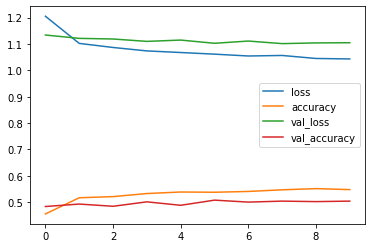

In [202]:
model_2=tf.keras.Sequential()
model_2.add(tf.keras.layers.Flatten())
model_2.add(tf.keras.layers.Dense(90, activation='relu'))
#Dropout layer
model_2.add(tf.keras.layers.Dropout(0.1))#10% units will be dropped
model_2.add(tf.keras.layers.Dense(4,activation='softmax'))
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])
tf.random.set_seed(100)
#validation split
hist_2=model_2.fit(X_train_1,y_train_1,epochs=10,validation_split=0.2)#training will be divided into 80% validation and 20%training
pd.DataFrame(hist_2.history).plot();
#Evaluating
model_2.evaluate(X_test_1,y_test_1)

In [203]:
print('Test loss', 1.0715935230255127)
print('Test accuracy', 0.5282738208770752)

Test loss 1.0715935230255127
Test accuracy 0.5282738208770752


In [213]:
model_2.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_29 (Flatten)        (None, 21)                0         
                                                                 
 dense_67 (Dense)            (None, 90)                1980      
                                                                 
 dropout_19 (Dropout)        (None, 90)                0         
                                                                 
 dense_68 (Dense)            (None, 4)                 364       
                                                                 
Total params: 2,344
Trainable params: 2,344
Non-trainable params: 0
_________________________________________________________________


The test loss(1.07) and training loss are almost equal to each other hence we can say that even though it is not a good model, owing to the accuracy, this model has less overfitting.
This model is better than the previous model as the difference between the test and training loss is reduced.

Early Stopping:

Epoch 1/10
135/135 [==============================] - 1s 3ms/step - loss: 1.1841 - accuracy: 0.4648 - val_loss: 1.1177 - val_accuracy: 0.4865
Epoch 2/10
135/135 [==============================] - 0s 2ms/step - loss: 1.0931 - accuracy: 0.5222 - val_loss: 1.1087 - val_accuracy: 0.4958
Epoch 3/10
135/135 [==============================] - 0s 2ms/step - loss: 1.0743 - accuracy: 0.5341 - val_loss: 1.1078 - val_accuracy: 0.5014
Epoch 4/10
135/135 [==============================] - 0s 2ms/step - loss: 1.0633 - accuracy: 0.5371 - val_loss: 1.1014 - val_accuracy: 0.4986
Epoch 5/10
135/135 [==============================] - 0s 2ms/step - loss: 1.0553 - accuracy: 0.5425 - val_loss: 1.1061 - val_accuracy: 0.4986
Epoch 6/10
135/135 [==============================] - 0s 2ms/step - loss: 1.0490 - accuracy: 0.5448 - val_loss: 1.0957 - val_accuracy: 0.5153
Epoch 7/10
135/135 [==============================] - 0s 2ms/step - loss: 1.0422 - accuracy: 0.5543 - val_loss: 1.1046 - val_accuracy: 0.5005
Epoch 

[1.0714175701141357, 0.5282738208770752]

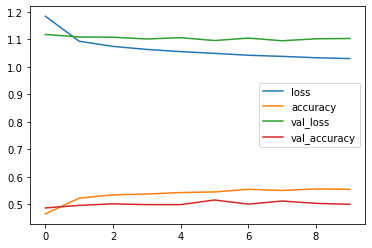

In [204]:
model_3=tf.keras.Sequential()
model_3.add(tf.keras.layers.Flatten())
model_3.add(tf.keras.layers.Dense(90, activation='relu'))
model_3.add(tf.keras.layers.Dense(4,activation='softmax'))
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)
#Training the model
tf.random.set_seed(100)
#validation split
hist_3=model_3.fit(X_train_1,y_train_1,epochs=10,validation_split=0.2,callbacks=[early_stop])#training will be divided into 80% validation and 20%training
pd.DataFrame(hist_3.history).plot();
#Evaluating
model_3.evaluate(X_test_1,y_test_1)

In [207]:
print('Test loss', 1.0714175701141357)
print('Test accuracy', 0.5282738208770752)

Test loss 1.0714175701141357
Test accuracy 0.5282738208770752


In [212]:
model_3.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_30 (Flatten)        (None, 21)                0         
                                                                 
 dense_69 (Dense)            (None, 90)                1980      
                                                                 
 dense_70 (Dense)            (None, 4)                 364       
                                                                 
Total params: 2,344
Trainable params: 2,344
Non-trainable params: 0
_________________________________________________________________


The model has not improved.

Adding a hidden layer

Epoch 1/10
135/135 [==============================] - 1s 3ms/step - loss: 1.1824 - accuracy: 0.4662 - val_loss: 1.1104 - val_accuracy: 0.5033
Epoch 2/10
135/135 [==============================] - 0s 2ms/step - loss: 1.0894 - accuracy: 0.5208 - val_loss: 1.1037 - val_accuracy: 0.4930
Epoch 3/10
135/135 [==============================] - 0s 2ms/step - loss: 1.0661 - accuracy: 0.5420 - val_loss: 1.1116 - val_accuracy: 0.4958
Epoch 4/10
135/135 [==============================] - 0s 2ms/step - loss: 1.0546 - accuracy: 0.5476 - val_loss: 1.0976 - val_accuracy: 0.4949
Epoch 5/10
135/135 [==============================] - 0s 2ms/step - loss: 1.0445 - accuracy: 0.5555 - val_loss: 1.1043 - val_accuracy: 0.4912
Epoch 6/10
135/135 [==============================] - 0s 2ms/step - loss: 1.0379 - accuracy: 0.5580 - val_loss: 1.0956 - val_accuracy: 0.5014
Epoch 7/10
135/135 [==============================] - 0s 2ms/step - loss: 1.0296 - accuracy: 0.5601 - val_loss: 1.1019 - val_accuracy: 0.5023
Epoch 

[1.0775591135025024, 0.5252976417541504]

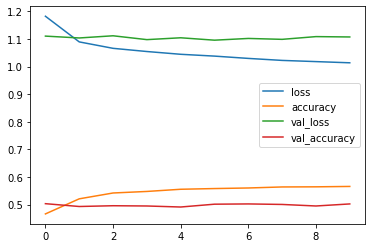

In [205]:
model_4=tf.keras.Sequential()
model_4.add(tf.keras.layers.Flatten())
model_4.add(tf.keras.layers.Dense(90, activation='relu'))
model_4.add(tf.keras.layers.Dense(25, activation='relu'))
model_4.add(tf.keras.layers.Dense(4,activation='softmax'))
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])
#Training the model
tf.random.set_seed(100)
#validation split
hist_4=model_4.fit(X_train_1,y_train_1,epochs=10,validation_split=0.2)#training will be divided into 80% validation and 20%training
pd.DataFrame(hist_4.history).plot();
#Evaluating
model_4.evaluate(X_test_1,y_test_1)

In [208]:
print('Test loss', 1.0775591135025024)
print('Test accuracy', 0.5282738208770752)

Test loss 1.0775591135025024
Test accuracy 0.5282738208770752


In [211]:
model_4.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_31 (Flatten)        (None, 21)                0         
                                                                 
 dense_71 (Dense)            (None, 90)                1980      
                                                                 
 dense_72 (Dense)            (None, 25)                2275      
                                                                 
 dense_73 (Dense)            (None, 4)                 104       
                                                                 
Total params: 4,359
Trainable params: 4,359
Non-trainable params: 0
_________________________________________________________________


The model has improved owing to the accuracy and the difference between the test and the training loss

Changing the no. of units




Epoch 1/10
135/135 [==============================] - 1s 3ms/step - loss: 1.1971 - accuracy: 0.4548 - val_loss: 1.1191 - val_accuracy: 0.4967
Epoch 2/10
135/135 [==============================] - 0s 2ms/step - loss: 1.0910 - accuracy: 0.5194 - val_loss: 1.1071 - val_accuracy: 0.4977
Epoch 3/10
135/135 [==============================] - 0s 2ms/step - loss: 1.0710 - accuracy: 0.5357 - val_loss: 1.1078 - val_accuracy: 0.4967
Epoch 4/10
135/135 [==============================] - 0s 2ms/step - loss: 1.0596 - accuracy: 0.5380 - val_loss: 1.1007 - val_accuracy: 0.4949
Epoch 5/10
135/135 [==============================] - 0s 2ms/step - loss: 1.0511 - accuracy: 0.5431 - val_loss: 1.1069 - val_accuracy: 0.4958
Epoch 6/10
135/135 [==============================] - 0s 2ms/step - loss: 1.0448 - accuracy: 0.5518 - val_loss: 1.0947 - val_accuracy: 0.5051
Epoch 7/10
135/135 [==============================] - 0s 2ms/step - loss: 1.0381 - accuracy: 0.5536 - val_loss: 1.1048 - val_accuracy: 0.5005
Epoch 

[1.0714712142944336, 0.5357142686843872]

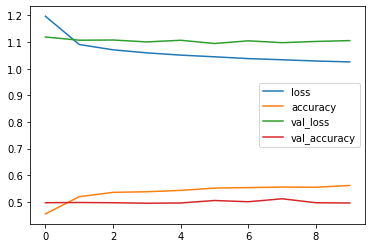

In [206]:
model_5=tf.keras.Sequential()
model_5.add(tf.keras.layers.Flatten())
model_5.add(tf.keras.layers.Dense(100, activation='relu'))
model_5.add(tf.keras.layers.Dense(4,activation='softmax'))
model_5.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])
#Training the model
tf.random.set_seed(100)
#validation split
hist_5=model_5.fit(X_train_1,y_train_1,epochs=10,validation_split=0.2)#training will be divided into 80% validation and 20%training
pd.DataFrame(hist_5.history).plot();
#Evaluating
model_5.evaluate(X_test_1,y_test_1)

In [209]:
print('Test loss', 1.0714712142944336)
print('Test accuracy',0.5357142686843872)

Test loss 1.0714712142944336
Test accuracy 0.5357142686843872


The model has definitely improved as there is less overfitting and we can therefore say that changing the no. of units was the best decsion to come at a solution

In [210]:
model_5.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_32 (Flatten)        (None, 21)                0         
                                                                 
 dense_74 (Dense)            (None, 100)               2200      
                                                                 
 dense_75 (Dense)            (None, 4)                 404       
                                                                 
Total params: 2,604
Trainable params: 2,604
Non-trainable params: 0
_________________________________________________________________


Increasing epochs

Epoch 1/100
135/135 [==============================] - 1s 4ms/step - loss: 1.1915 - accuracy: 0.4506 - val_loss: 1.1247 - val_accuracy: 0.4856
Epoch 2/100
135/135 [==============================] - 0s 2ms/step - loss: 1.0941 - accuracy: 0.5257 - val_loss: 1.1096 - val_accuracy: 0.4995
Epoch 3/100
135/135 [==============================] - 0s 2ms/step - loss: 1.0741 - accuracy: 0.5311 - val_loss: 1.1122 - val_accuracy: 0.4921
Epoch 4/100
135/135 [==============================] - 0s 2ms/step - loss: 1.0621 - accuracy: 0.5387 - val_loss: 1.1033 - val_accuracy: 0.4958
Epoch 5/100
135/135 [==============================] - 0s 2ms/step - loss: 1.0531 - accuracy: 0.5473 - val_loss: 1.1070 - val_accuracy: 0.4930
Epoch 6/100
135/135 [==============================] - 0s 2ms/step - loss: 1.0463 - accuracy: 0.5529 - val_loss: 1.0943 - val_accuracy: 0.5060
Epoch 7/100
135/135 [==============================] - 0s 2ms/step - loss: 1.0387 - accuracy: 0.5532 - val_loss: 1.1055 - val_accuracy: 0.4847

[1.1097241640090942, 0.5148809552192688]

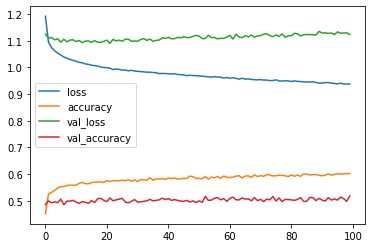

In [217]:
model_6=tf.keras.Sequential()
model_6.add(tf.keras.layers.Flatten())
model_6.add(tf.keras.layers.Dense(100, activation='relu'))
model_6.add(tf.keras.layers.Dense(4,activation='softmax'))
model_6.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])
#Training the model
tf.random.set_seed(100)
#validation split
hist_5=model_6.fit(X_train_1,y_train_1,epochs=100,validation_split=0.2)#training will be divided into 80% validation and 20%training
pd.DataFrame(hist_6.history).plot();
#Evaluating
model_6.evaluate(X_test_1,y_test_1)

In [215]:
models=['Model1','Model2','Model3','Model4','Model5'] 
test_loss=[1.073, 1.073,1.071,1.077,1.077]
df1=pd.DataFrame(models, columns=['models'])
df2=pd.DataFrame(test_loss, columns=['train_loss'])
df_final=pd.concat([df1,df2],axis=1)
df_final

,models,train_loss
0,Model1,1.073
1,Model2,1.073
2,Model3,1.071
3,Model4,1.077
4,Model5,1.077


Text(0.5, 1.0, 'Algorithm Performance Comparison')

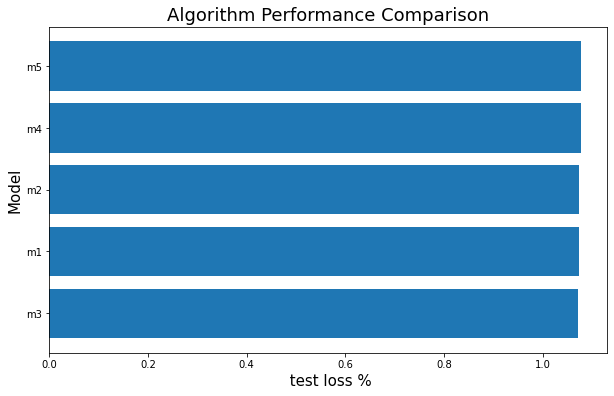

In [216]:
comp_data= {'model Name':['m1','m2','m3','m4','m5'], 'Test_loss':[1.073, 1.073,1.071,1.077,1.077]}

comp_df=df = pd.DataFrame(comp_data)

comp_df_sorted= comp_df.sort_values('Test_loss')

comp_df_sorted

plt.figure(figsize=(10,6))

plt.barh(comp_df_sorted['model Name'], comp_df_sorted['Test_loss'],data=comp_df_sorted)

plt.xlabel(" test loss %", size=15)

plt.ylabel("Model", size=15)

plt.title("Algorithm Performance Comparison", size=18)

The model 5 was finally the best model, with the no. of units changed to 100 in the hidden layer. As the number of epochs increases, more number of times the weight are changed in the neural network and the curve goes from underfitting to optimal to overfitting curve. The no. of epochs had somehow decreased the accuracy so keeping the no. of epochs to a minimum and adding the required hyperparameter is very important to improve a model.